# Paintings: Impressionism vs Modernism (easy mode)

In this notebook we'll use [fastai](https://docs.fast.ai/) to classify paintings as either 'impressionist' or 'modernist'. 

We begin by setting up our notebook and importing the fastai libraries:

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

## Looking at the data

Our data exists in the `data/paintings/` directory. We'll create an `ImageDataBunch` and make sure we can visually tell the difference between impressionist paintings and modernist paintings.

In [2]:
path = 'data/paintings/'

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [3]:
data.classes

['impressionism', 'modernism']

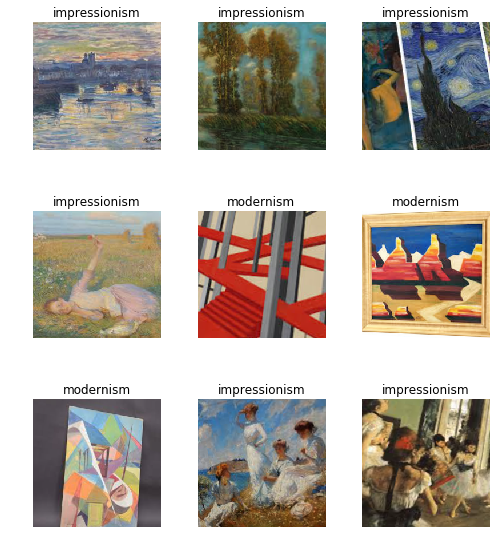

In [5]:
data.show_batch(rows=3, figsize=(7,8))

## Training a model

Now that we've got our data and it looks correct, let's create a learner for this data. We'll use a ResNet-34 architecture and train for five epochs to get a sense for how well we're doing.

In [8]:
learner = create_cnn(data, models.resnet34, metrics=error_rate)

In [9]:
learner.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate
1,0.976094,0.502022,0.225000
2,0.683104,0.202733,0.100000
3,0.488111,0.158647,0.100000
4,0.383773,0.142937,0.050000
5,0.321568,0.141001,0.050000


Not bad! With essentially no work at all, we've achieved an accuracy of 95% on our validation set. Next we'll look at how learning changes with a variety of learning rates.

In [12]:
learner.save('stage-1')

In [13]:
learner.unfreeze()

In [15]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


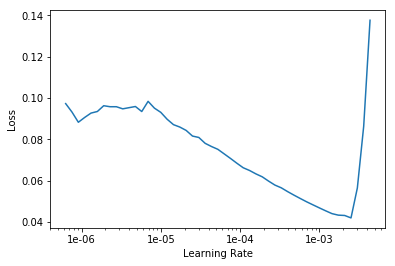

In [16]:
learner.recorder.plot()

The above plot shows us that loss decreases for learning rates between `1e-5` and `1e-3`. I'll just go ahead and use a value in the middle (`1e-4`) for our learning rate. This time I'll also let it run for longer.

In [20]:
learner.fit_one_cycle(15, max_lr=slice(1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.004363,0.066491,0.025000
2,0.003223,0.067467,0.025000
3,0.002825,0.066332,0.025000
4,0.005148,0.062533,0.025000
5,0.011834,0.059702,0.025000
6,0.010522,0.059202,0.025000
7,0.009327,0.057882,0.025000
8,0.008938,0.059379,0.025000
9,0.008633,0.055146,0.025000
10,0.008136,0.053470,0.025000


Perfect! We've correctly classified 100% of our validation set. 

Validation loss seems to have continued to decrease so it doesn't look like we've overfit despite training for more epochs.